```
Laboratorio 2
MO826 - Ciencia de dados em saúde
1o. semestre 2021

Edgar Tanaka, RA: 023577
Aline Borges, RA: 210598
Tiago Negrao (ouvinte)
```

In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Dados de idade faltando

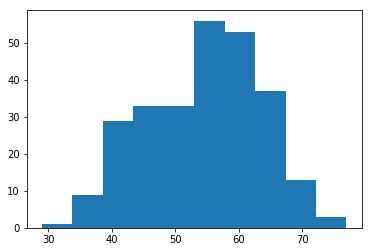

In [126]:
df = pd.read_csv('heart-missing-age.csv')

plt.hist(df[df['age'].isnull() == False].age)
plt.show()

In [127]:
# Function to load all histograms
def plot_hist_all_columns(df, cols):
    fig = plt.figure(figsize=(15, 12))

    # loop over all vars (total: 34)
    for i in cols:
        plt.subplot(6, 6, i+1)
        f = plt.gca()
#         f.axes.get_yaxis().set_visible(False)
#         f.axes.set_ylim([0, df.shape[0]])

        vals = np.size(df.iloc[:, i].unique())
        if vals < 10:
            bins = vals
        else:
            vals = 10

        plt.hist(df.iloc[:, i], bins=30)
        plt.title(df.columns[i])

    plt.tight_layout()

## Histogramas por atributo: Todos dados, sem filtros

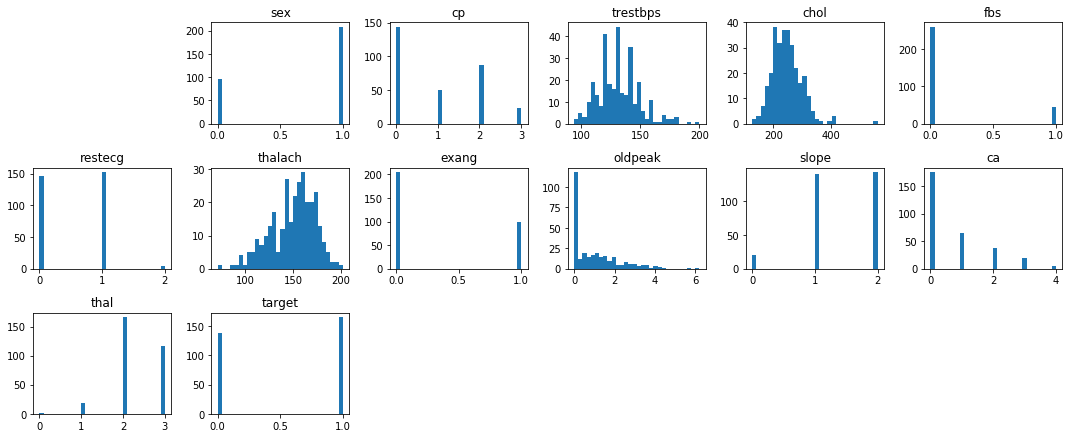

In [128]:
cols = list(range(1, df.shape[1]))
plot_hist_all_columns(df, cols)

## Histogramas por atributo: apenas linhas onde o atributo "idade" está faltando

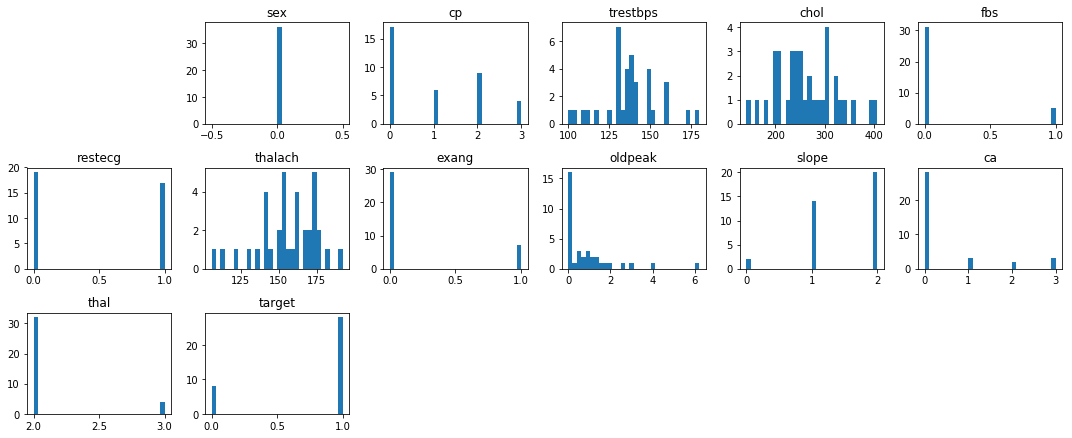

In [129]:
plot_hist_all_columns(df[df['age'].isnull()], cols)

## Histogramas por atributo: apenas linhas onde o atributo "idade" está presente

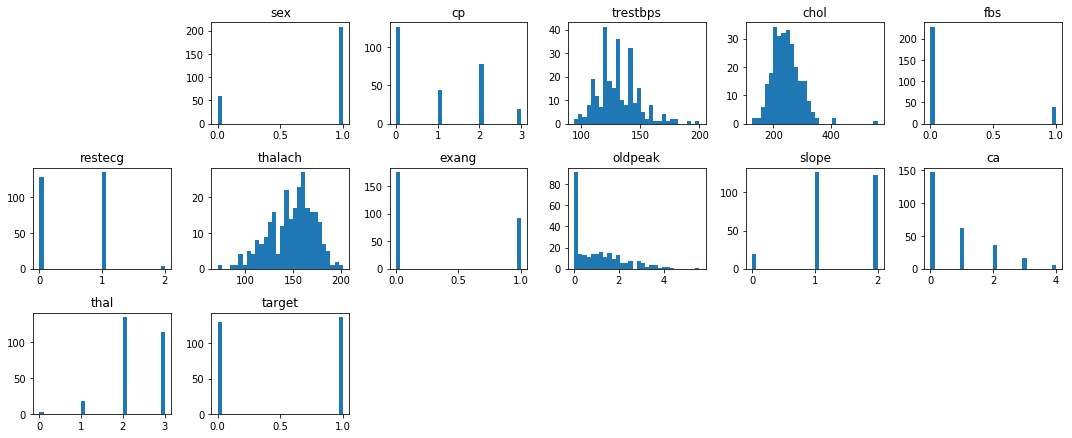

In [130]:
plot_hist_all_columns(df[df['age'].isnull() == False], cols)

## Análise MCAR, MAR, MNAR

A distribuição de pessoas está na proporção de 1 para 2. Para cada pessoa do sexo 0 existem duas pessoas do sexo 1. Se os casos de dados faltantes de idade fosse aleatório, essa proporção 1:2 deveria aparecer no histograma "sex" da seção 2.2. Não é o que vemos. O que vemos é que todos os casos são de pessoas do sexo 0. 
Sendo assim, podemos concluir que existe uma correlação entre dados de idade faltante e sexo 0. 

Como o dado faltante depende de uma variável observada, esse é um caso de MAR (Missing at random).

# Faltando dados de colesterol

In [131]:
df = pd.read_csv('heart-missing-chol.csv')

## Histogramas por atributo: Todos dados, sem filtros

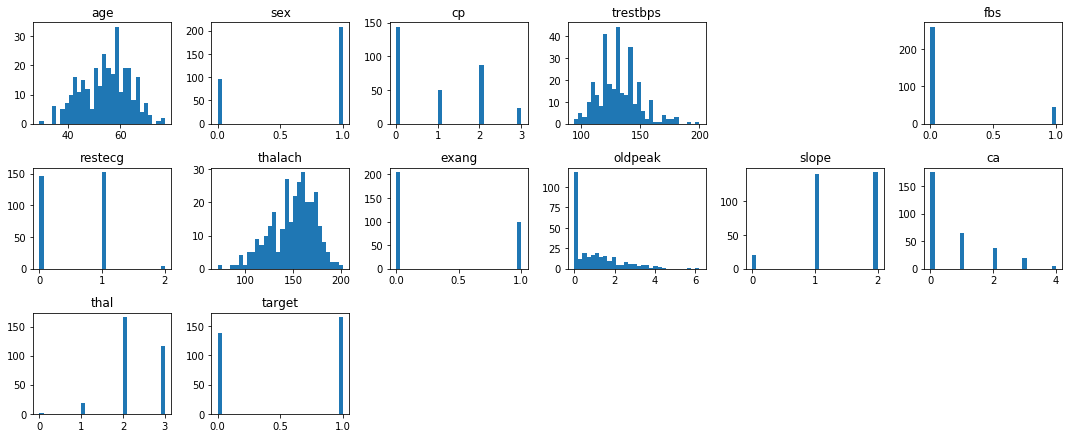

In [132]:
cols = list(range(df.shape[1]))
cols.pop(4) # remove the cholesterol because it has nans
plot_hist_all_columns(df, cols)

## Histogramas por atributo: apenas linhas onde o atributo "colesterol" está faltando

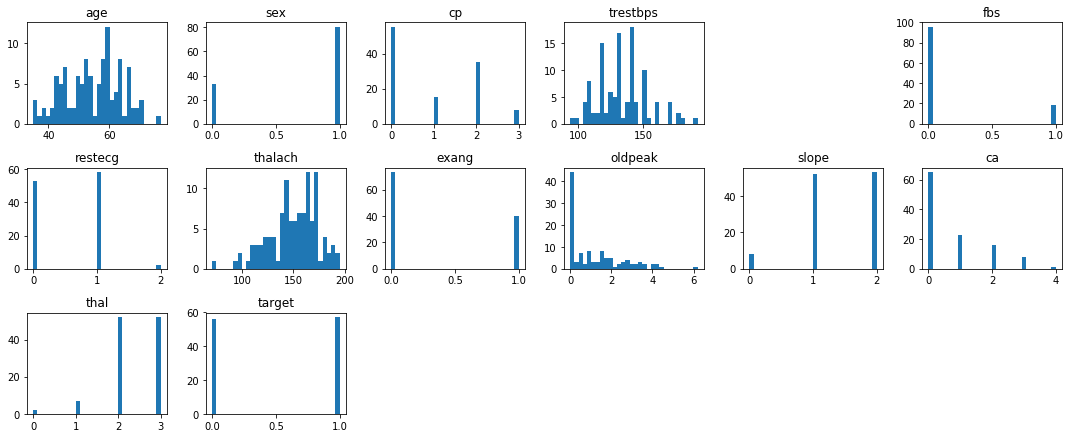

In [133]:
plot_hist_all_columns(df[df['chol'].isnull()], cols)

## Histogramas por atributo: apenas linhas onde o atributo "idade" está presente

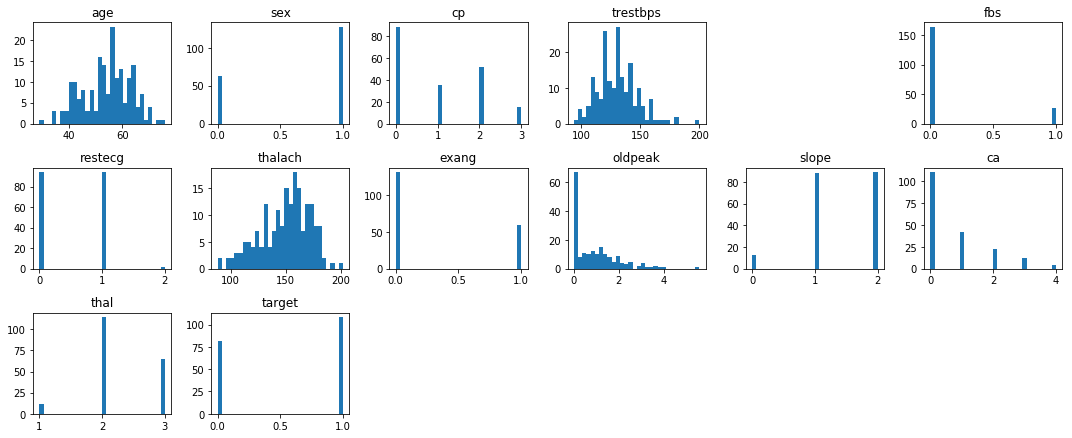

In [134]:
plot_hist_all_columns(df[df['chol'].isnull() == False], cols)

## Análise MCAR, MAR, MNAR

Analisando os histogramas das seções 3.1, 3.2 e 3.3, os histogramas sempre mostram distribuições
parecidas nas três seções. Isso indica não haver nenhuma variável que influência na falta de dados.
A variável `thal` mostrou as maiores diferenças entre as 3 seções no entanto não me parece ser algo
que indica uma influência na falta de dados.

Concluo então que este é um caso de MCAR (Missing completely at random).

# Missing sex

In [142]:
df = pd.read_csv('heart-missing-sex.csv')

## Histogramas por atributo: Todos dados, sem filtros

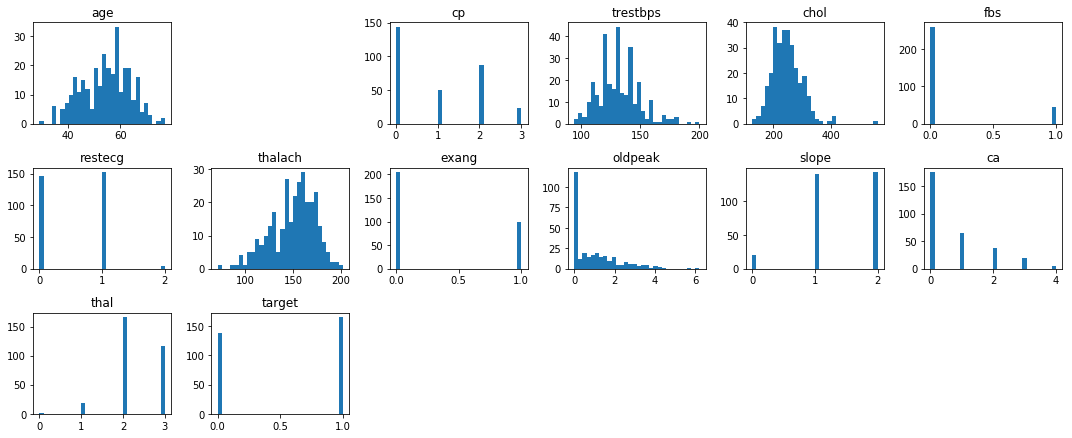

In [137]:
cols = list(range(df.shape[1]))
cols.pop(1) # remove the sex because it has nans
plot_hist_all_columns(df, cols)

## Histogramas por atributo: apenas linhas onde o atributo "sexo" está faltando

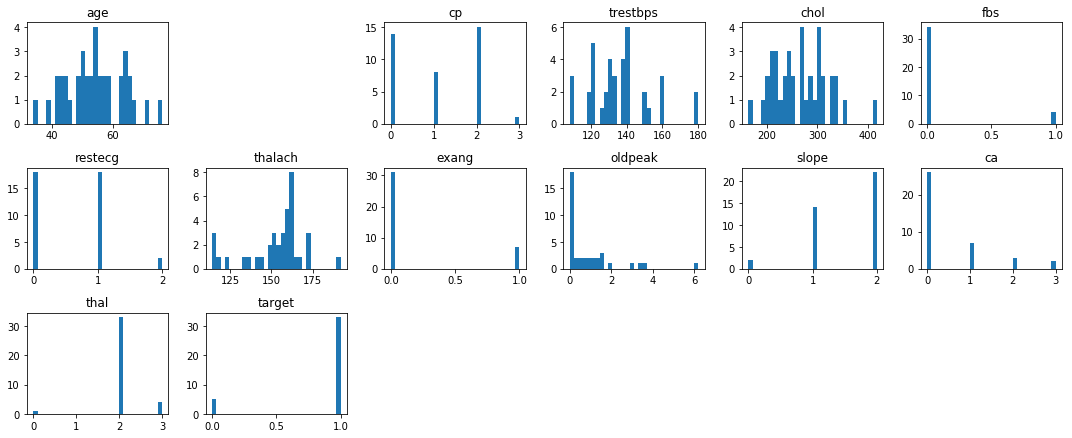

In [138]:
plot_hist_all_columns(df[df['sex'].isnull()], cols)

## Histogramas por atributo: apenas linhas onde o atributo "sexo" está presente

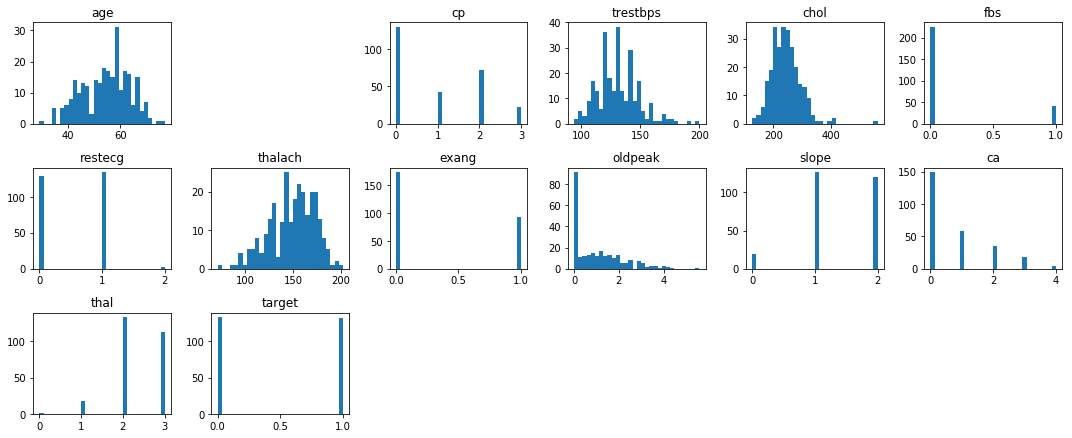

In [139]:
plot_hist_all_columns(df[df['sex'].isnull() == False], cols)

## Histograma: atributo sexo (dataset original sem dados faltantes)

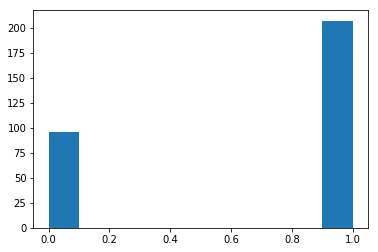

In [146]:
df = pd.read_csv('heart.csv')
plt.hist(df.sex)
plt.show()

## Histograma: Dados de sexo (dataset heart-missing-sex.csv)

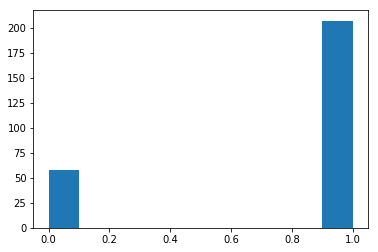

In [147]:
df = pd.read_csv('heart-missing-sex.csv')
plt.hist(df[df['sex'].isnull() == False].sex)
plt.show()

## Análise MCAR, MAR, MNAR

Comparando os histogramas em 4.4 e 4.5, notamos que houve uma diminuição nos dados apenas em pessoas do sexo 0. 
Esse é um caso de MNAR pois a falta de dados de sexo depende de informação não observada (neste caso o próprio dado faltante).

Uma outra hipótese é que a falta de dados dependa das variáveis `thal` e `target` pois sua distribuição não é a mesma nos histogramas de 4.1 e 4.2. De acordo com o dicionário de dados (https://archive.ics.uci.edu/ml/datasets/heart+Disease), a variável `target` é uma predição de um modelo portanto não é uma variável observada. Não ficou claro o que a variável `thal` representa. Caso `thal` seja uma variável observada, poderíamos dizer que esse é um caso de MAR.

# Reposição de dados

## Reposição de dados de idade 

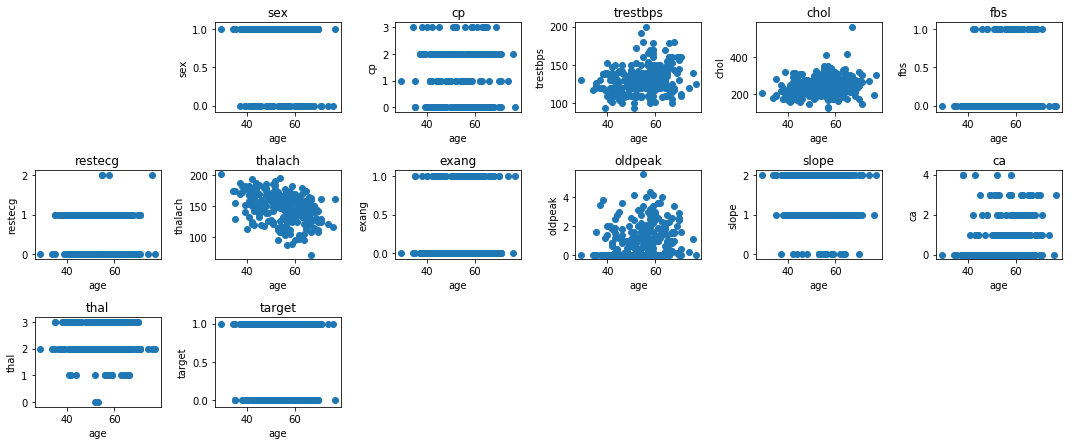

In [169]:
def plot_hist_all_columns(df, cols):
    fig = plt.figure(figsize=(15, 12))

    # loop over all vars (total: 34)
    for i in cols:
        plt.subplot(6, 6, i+1)
        f = plt.gca()
        
        x = df['age']
        y = df.iloc[:, i]

        plt.scatter(x, y)
        plt.xlabel('age')
        plt.ylabel(df.columns[i])
        plt.title(df.columns[i])

    plt.tight_layout()

cols = list(range(1, df.shape[1]))
df = pd.read_csv('heart-missing-age.csv')
df = df[df['age'].isnull() == False]

plot_hist_all_columns(df, cols)


Acima plotamos todos os pontos de dados em que o atributo idade está presente. Buscamos com isso encontrar um atributo que 
pudesse ser usado em um regressor. A única variável que aparenta ter correlação com idade é `thalach`. 
Esse atributo indica "Frequência cardíaca máxima alcançada". Olhando para o gráfico, faz sentido que haja uma 
correlação negativa entre idade e frequência cardíaca máxima. Isto é, quanto mais velhos ficamos, menor é a
frequência cardíaca máxima. 
Sendo assim, eu treinaria um regressor linear em dados de frequência cardíaca
para repor esses dados de idade faltantes. Eu levaria em conta também o atributo sexo pois sabemos que 
a frequência depende do sexo da pessoa (https://www.tuasaude.com/frequencia-cardiaca/).


## Reposição de dados de colesterol 

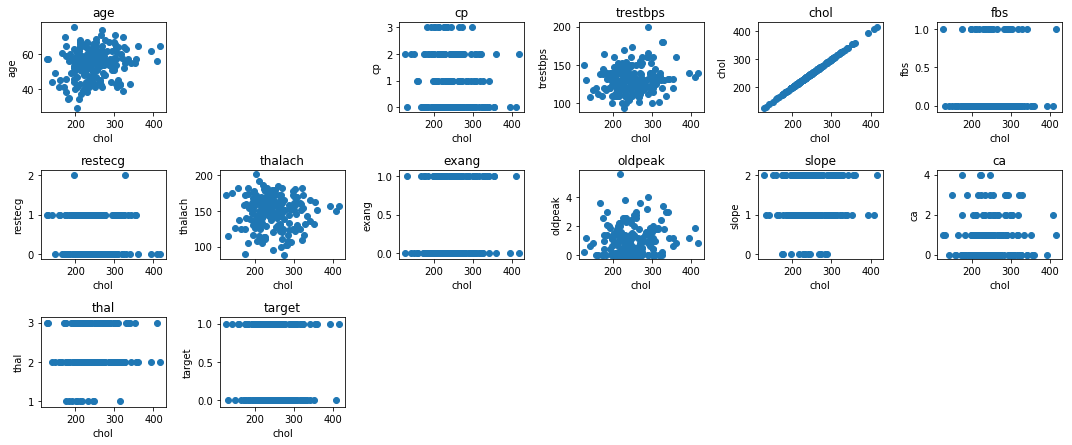

In [202]:
def plot_hist_all_columns(df, cols):
    fig = plt.figure(figsize=(15, 12))

    # loop over all vars (total: 34)
    for i in cols:
        plt.subplot(6, 6, i+1)
        f = plt.gca()
        
        x = df['chol']
        y = df.iloc[:, i]

        plt.scatter(x, y)
        plt.xlabel('chol')
        plt.ylabel(df.columns[i])
        plt.title(df.columns[i])

    plt.tight_layout()

cols = list(range(df.shape[1]))
cols.pop(1) # remove the sex because it has nans
df = pd.read_csv('heart-missing-chol.csv')
df = df[df['chol'].isnull() == False]

plot_hist_all_columns(df, cols)


Analisando os scatter plots acima, parece haver uma correlação positiva entre idade e colesterol.
Poderíamos usar um regressor para estimar o colesterol baseado na idade. 
Como vamos também uma dispersão nos dados, poderíamos usar a técnica Stochastic Regression Imputation para adição de
um erro residual.

## Reposição de dados de sexo 

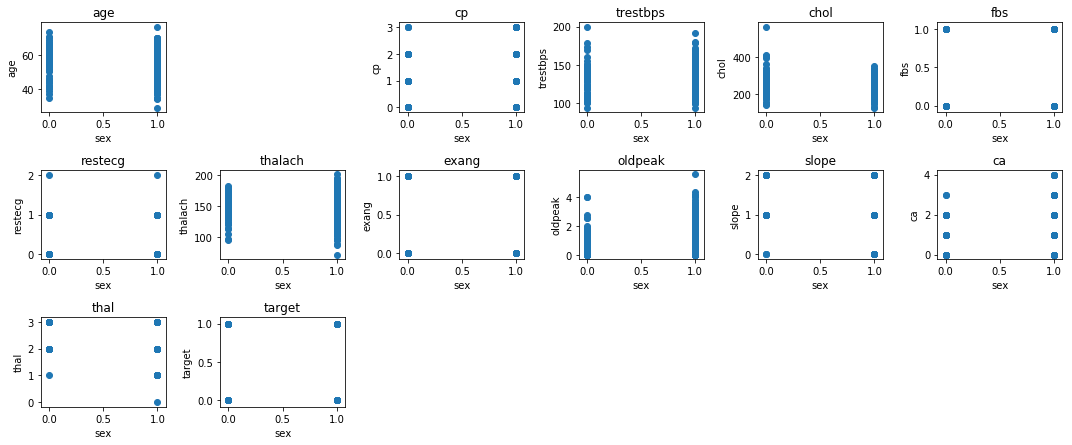

In [172]:
def plot_hist_all_columns(df, cols):
    fig = plt.figure(figsize=(15, 12))

    # loop over all vars (total: 34)
    for i in cols:
        plt.subplot(6, 6, i+1)
        f = plt.gca()
        
        x = df['sex']
        y = df.iloc[:, i]

        plt.scatter(x, y)
        plt.xlabel('sex')
        plt.ylabel(df.columns[i])
        plt.title(df.columns[i])

    plt.tight_layout()

cols = list(range(df.shape[1]))
cols.pop(1) # remove the sex because it has nans
df = pd.read_csv('heart-missing-sex.csv')
df = df[df['sex'].isnull() == False]

plot_hist_all_columns(df, cols)


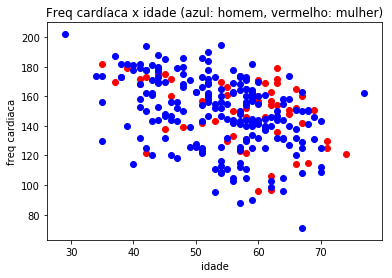

In [190]:
raw_df = pd.read_csv('heart-missing-sex.csv')
df = raw_df[raw_df['sex'] == 0] # female
x = df['age']
y = df['thalach']

plt.scatter(x, y, c='red')

df = raw_df[raw_df['sex'] == 1] # male
x = df['age']
y = df['thalach']

plt.scatter(x, y, c='blue')
plt.xlabel('idade')
plt.ylabel('freq cardiaca')
plt.title('Freq cardíaca x idade (azul: homem, vermelho: mulher)')
plt.show()

No gráfico acima, temos pontos de dados de homens em azul e de mulheres em vermelho. 
Escolhemos as dimensões de frequência cardíaca e idade pois sabemos que elas estão correlacionadas
com o sexo (https://www.tuasaude.com/frequencia-cardiaca/)

Uma idéia para repor os dados faltantes é inserir o dado onde sexo é faltante no espaço acima e então
calcular em um determinado raio quanto vizinhos de pontos vermelho e pontos azuis temos. Caso haja
mais pontos azuis neste raio, consideramos então que este ponto de dado vem de um homem. Caso contrário, consideramos que vem de uma mulher. Como há desbalanceamento entre pontos azuis vs vermelhos, poderíamos 
aleatoriamente remover pontos azuis de modo a equalizar as duas cores. Esse pré-processamento deve anteceder 
a contagem de pontos vizinhos.

Os pontos estão bastante confusos no scatterplot acima pois temos poucos pontos de dados. 
Talvez fosse interessante filtrar os dados a partir de uma outra dimensão (talvez algo que discrimine pessoas
ativas/sadias de pessoas sedentárias).

# Dicionário de dados
```
Only 14 attributes used:
1. #3 (age)
2. #4 (sex)
3. #9 (cp)
4. #10 (trestbps)
5. #12 (chol)
6. #16 (fbs)
7. #19 (restecg)
8. #32 (thalach)
9. #38 (exang)
10. #40 (oldpeak)
11. #41 (slope)
12. #44 (ca)
13. #51 (thal)
14. #58 (num) (the predicted attribute)


Complete attribute documentation:
1 id: patient identification number
2 ccf: social security number (I replaced this with a dummy value of 0)
3 age: age in years
4 sex: sex (1 = male; 0 = female)
5 painloc: chest pain location (1 = substernal; 0 = otherwise)
6 painexer (1 = provoked by exertion; 0 = otherwise)
7 relrest (1 = relieved after rest; 0 = otherwise)
8 pncaden (sum of 5, 6, and 7)
9 cp: chest pain type
-- Value 1: typical angina
-- Value 2: atypical angina
-- Value 3: non-anginal pain
-- Value 4: asymptomatic
10 trestbps: resting blood pressure (in mm Hg on admission to the hospital)
11 htn
12 chol: serum cholestoral in mg/dl
13 smoke: I believe this is 1 = yes; 0 = no (is or is not a smoker)
14 cigs (cigarettes per day)
15 years (number of years as a smoker)
16 fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
17 dm (1 = history of diabetes; 0 = no such history)
18 famhist: family history of coronary artery disease (1 = yes; 0 = no)
19 restecg: resting electrocardiographic results
-- Value 0: normal
-- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
-- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
20 ekgmo (month of exercise ECG reading)
21 ekgday(day of exercise ECG reading)
22 ekgyr (year of exercise ECG reading)
23 dig (digitalis used furing exercise ECG: 1 = yes; 0 = no)
24 prop (Beta blocker used during exercise ECG: 1 = yes; 0 = no)
25 nitr (nitrates used during exercise ECG: 1 = yes; 0 = no)
26 pro (calcium channel blocker used during exercise ECG: 1 = yes; 0 = no)
27 diuretic (diuretic used used during exercise ECG: 1 = yes; 0 = no)
28 proto: exercise protocol
1 = Bruce
2 = Kottus
3 = McHenry
4 = fast Balke
5 = Balke
6 = Noughton
7 = bike 150 kpa min/min (Not sure if "kpa min/min" is what was written!)
8 = bike 125 kpa min/min
9 = bike 100 kpa min/min
10 = bike 75 kpa min/min
11 = bike 50 kpa min/min
12 = arm ergometer
29 thaldur: duration of exercise test in minutes
30 thaltime: time when ST measure depression was noted
31 met: mets achieved
32 thalach: maximum heart rate achieved
33 thalrest: resting heart rate
34 tpeakbps: peak exercise blood pressure (first of 2 parts)
35 tpeakbpd: peak exercise blood pressure (second of 2 parts)
36 dummy
37 trestbpd: resting blood pressure
38 exang: exercise induced angina (1 = yes; 0 = no)
39 xhypo: (1 = yes; 0 = no)
40 oldpeak = ST depression induced by exercise relative to rest
41 slope: the slope of the peak exercise ST segment
-- Value 1: upsloping
-- Value 2: flat
-- Value 3: downsloping
42 rldv5: height at rest
43 rldv5e: height at peak exercise
44 ca: number of major vessels (0-3) colored by flourosopy
45 restckm: irrelevant
46 exerckm: irrelevant
47 restef: rest raidonuclid (sp?) ejection fraction
48 restwm: rest wall (sp?) motion abnormality
0 = none
1 = mild or moderate
2 = moderate or severe
3 = akinesis or dyskmem (sp?)
49 exeref: exercise radinalid (sp?) ejection fraction
50 exerwm: exercise wall (sp?) motion
51 thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
52 thalsev: not used
53 thalpul: not used
54 earlobe: not used
55 cmo: month of cardiac cath (sp?) (perhaps "call")
56 cday: day of cardiac cath (sp?)
57 cyr: year of cardiac cath (sp?)
58 num: diagnosis of heart disease (angiographic disease status)
-- Value 0: < 50% diameter narrowing
-- Value 1: > 50% diameter narrowing
(in any major vessel: attributes 59 through 68 are vessels)
59 lmt
60 ladprox
61 laddist
62 diag
63 cxmain
64 ramus
65 om1
66 om2
67 rcaprox
68 rcadist
69 lvx1: not used
70 lvx2: not used
71 lvx3: not used
72 lvx4: not used
73 lvf: not used
74 cathef: not used
75 junk: not used
76 name: last name of patient (I replaced this with the dummy string "name")

https://archive.ics.uci.edu/ml/datasets/heart+disease
```